In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 
drv, _ = which_computer()

In [6]:
# conditions for 95th HoLo per Alfredo email
Hs=2.6139
Tp=9.3503
Bf = [.052, .103, .153]

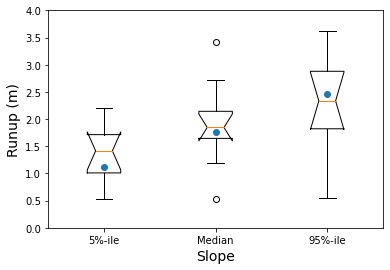

In [15]:
# Variation due to slopes
R2_slopes = np.empty((len(func_list),3))
R2_S06 = np.empty((3))
for j, sl in enumerate( Bf ):
    R2_S06[j]=S06(Hs, calc_L0(Tp),sl)
    for i, item in enumerate( func_list):
        cmd = "R2_slopes[i][j]={}({}, {}, {})".format(item, Hs, calc_L0(Tp), sl)
        # print(cmd)
        exec(cmd)

#plt.title('95th percentile H_s and T_p')
plt.boxplot(R2_slopes, notch=True)
plt.ylim([0, 4.])
plt.plot([1,2,3],R2_S06,'o') # Stockdon
plt.ylabel('Runup (m)', fontsize=14)

plt.xticks([1,2,3], ['5%-ile','Median','95%-ile'])
plt.xlabel('Slope',fontsize=14)
plt.savefig(drv+'crs/proj/2022_Runup/HoM_ten_equations_boxplot.svg', dpi=200)

In [16]:
print("95 low")
stat_summary(R2_slopes[:,0], iprint=True)
print("median")
stat_summary(R2_slopes[:,1], iprint=True)
print("95 high")
stat_summary(R2_slopes[:,2], iprint=True)

95 low
  n, nnan, nvalid:  10 0 10
  mean, std, min, max   : 1.355 0.533 0.529 2.210
  d5, d25, d50, d75, d95: 0.561 1.010 1.415 1.714 2.064
median
  n, nnan, nvalid:  10 0 10
  mean, std, min, max   : 1.902 0.749 0.535 3.424
  d5, d25, d50, d75, d95: 0.828 1.645 1.846 2.143 3.110
95 high
  n, nnan, nvalid:  10 0 10
  mean, std, min, max   : 2.509 1.168 0.540 5.086
  d5, d25, d50, d75, d95: 1.048 1.821 2.334 2.879 4.429


{'n': 10,
 'nnan': 0,
 'nvalid': 10,
 'mean': 2.5094042754520096,
 'std': 1.168178691913332,
 'min': 0.5403529184178623,
 'max': 5.086495888083331,
 'd5': 1.048405538792275,
 'd25': 1.8214931568183124,
 'd50': 2.333995652835786,
 'd75': 2.8792628273198173,
 'd95': 4.428728659310622}